In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
festivales_bcn_19 = pd.read_pickle("./data/festivales_bcn_19_procesado.pkl")

In [37]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [38]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [39]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [40]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [41]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [42]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [43]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [44]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [45]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [46]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [47]:
festivales_bcn_19.describe().loc["mean"]

Edicio           14.631579
Asistentes    39208.879310
Name: mean, dtype: float64

In [48]:
festivales_bcn_19.describe().loc["50%"]

Edicio           13.0
Asistentes    18438.0
Name: 50%, dtype: float64

In [49]:
festivales_bcn_19.describe().loc["max"]

Edicio            43.0
Asistentes    273262.0
Name: max, dtype: float64

In [50]:
festivales_bcn_19.describe().loc["min"]

Edicio           2.0
Asistentes    2160.0
Name: min, dtype: float64

In [51]:
festivales_bcn_19[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Otoño


Comentarios <br>


Frecuencias relativa y absoluta

In [52]:
for catego in categoricas_destacadas:
    print(festivales_bcn_19[catego].value_counts())
    print("\n")

Ambit
Música                         22
Audiovisuals                   15
Multidisciplinaris i altres     7
Arts visuals                    5
Arts escèniques                 5
Lletres                         4
Name: count, dtype: int64


Titularidad
Privada    44
Pública    12
Mixta       2
Name: count, dtype: int64


Mes
Junio         10
Octubre        9
Noviembre      8
Marzo          7
Julio          5
Septiembre     4
Mayo           4
Enero          4
Febrero        3
Abril          2
Agosto         2
Name: count, dtype: int64


Estacion
Otoño        17
Verano       16
Primavera    13
Invierno     12
Name: count, dtype: int64




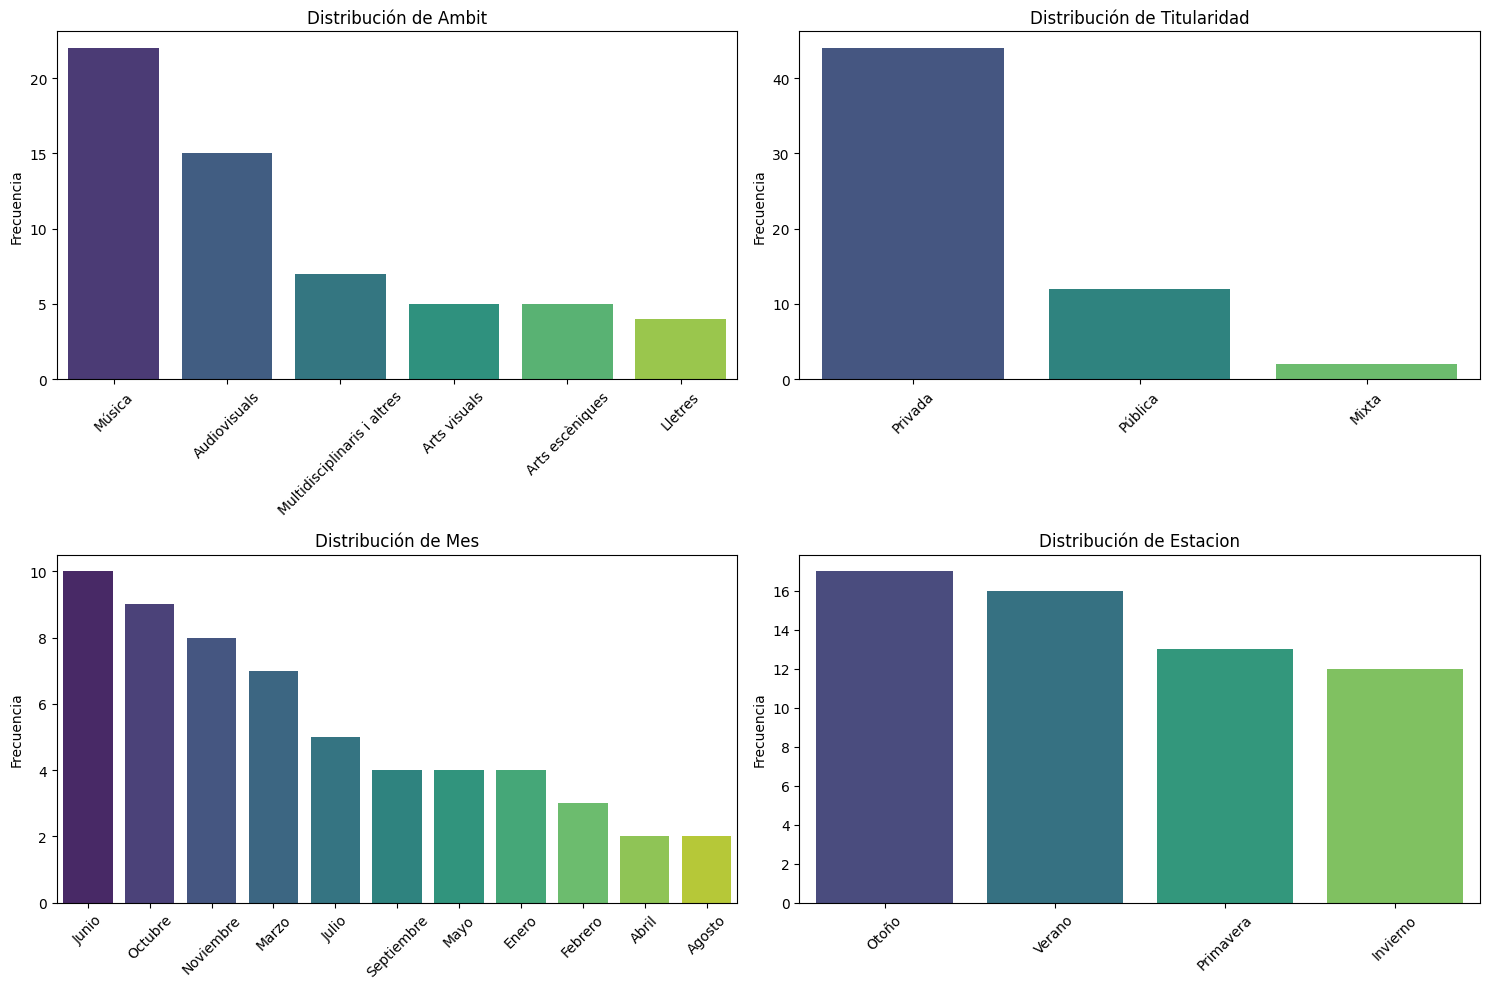

In [53]:
pinta_distribucion_categoricas(festivales_bcn_19, categoricas_destacadas)

Comentarios <br>


In [54]:
for catego in categoricas_destacadas:
    print(festivales_bcn_19[catego].value_counts()/len(festivales_bcn_19)*100)
    print("\n")

Ambit
Música                         37.931034
Audiovisuals                   25.862069
Multidisciplinaris i altres    12.068966
Arts visuals                    8.620690
Arts escèniques                 8.620690
Lletres                         6.896552
Name: count, dtype: float64


Titularidad
Privada    75.862069
Pública    20.689655
Mixta       3.448276
Name: count, dtype: float64


Mes
Junio         17.241379
Octubre       15.517241
Noviembre     13.793103
Marzo         12.068966
Julio          8.620690
Septiembre     6.896552
Mayo           6.896552
Enero          6.896552
Febrero        5.172414
Abril          3.448276
Agosto         3.448276
Name: count, dtype: float64


Estacion
Otoño        29.310345
Verano       27.586207
Primavera    22.413793
Invierno     20.689655
Name: count, dtype: float64




Comentarios <br>


Medidas de posición

In [55]:
festivales_bcn_19.describe()

,Edicio,Asistentes
count,57.000000,58.00000
mean,14.631579,39208.87931
std,8.861295,55267.50375
min,2.000000,2160.00000
25%,8.000000,9075.00000
50%,13.000000,18438.00000
75%,21.000000,33900.00000
max,43.000000,273262.00000


In [56]:
get_IQR(festivales_bcn_19,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

13.0

In [57]:
print(festivales_bcn_19["Edicio"].quantile(0.5), "\n",
    festivales_bcn_19["Edicio"].quantile(0.9), "\n",
    festivales_bcn_19["Edicio"].quantile(0.95), "\n",
    festivales_bcn_19["Edicio"].max())

13.0 
 26.4 
 29.199999999999996 
 43.0


Comentarios <br>


In [58]:
get_IQR(festivales_bcn_19,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

24825.0

In [59]:
print(festivales_bcn_19["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_19["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_19["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_19["Asistentes"].max())

18438.0 
 106500.00000000001 
 152174.99999999994 
 273262.0


Comentarios <br>


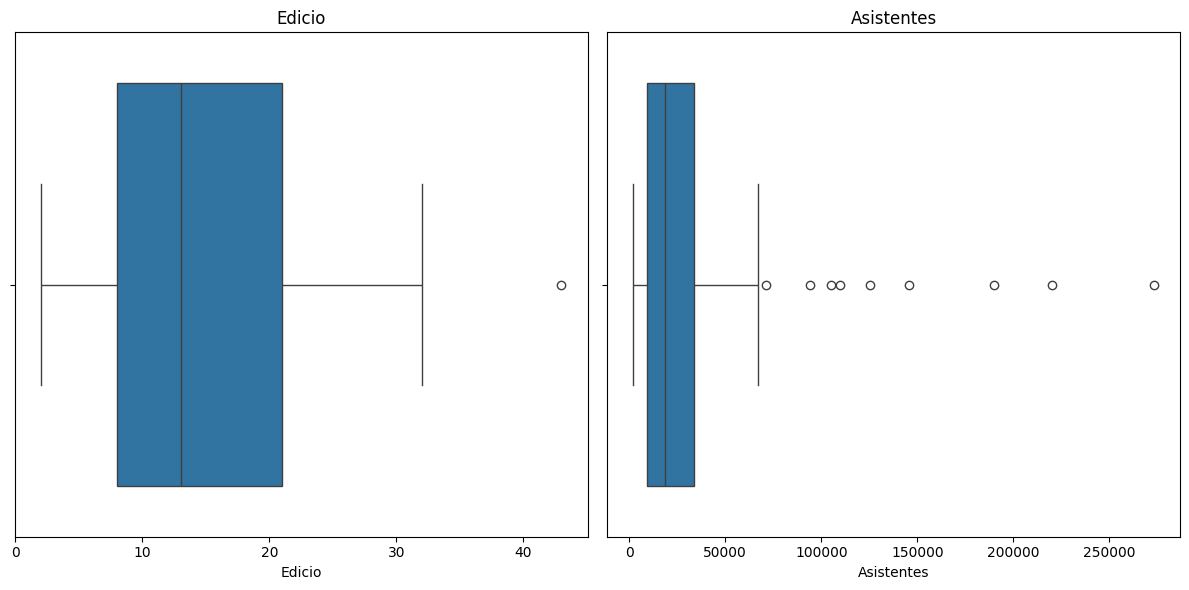

In [60]:
plot_multiple_boxplots(festivales_bcn_19, columnas_numericas_fests)

Comentarios <br>


In [61]:
plot_boxplot_grouped(festivales_bcn_19, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [62]:
festivales_bcn_19.describe().loc[["std", "mean"]].T

,std,mean
Edicio,8.861295,14.631579
Asistentes,55267.503750,39208.879310


In [63]:
variabilidad(festivales_bcn_19)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,8.861295,14.631579,0.605628
Asistentes,55267.503750,39208.879310,1.409566


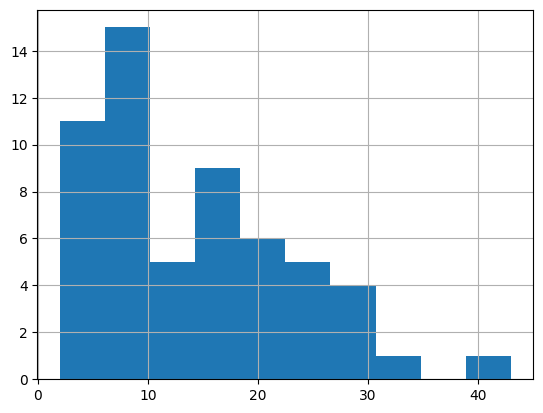

In [64]:
festivales_bcn_19["Edicio"].hist();

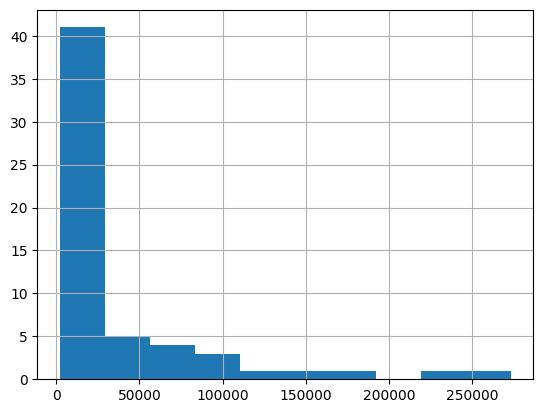

In [65]:
festivales_bcn_19["Asistentes"].hist();

Comentarios <br>


Distribución

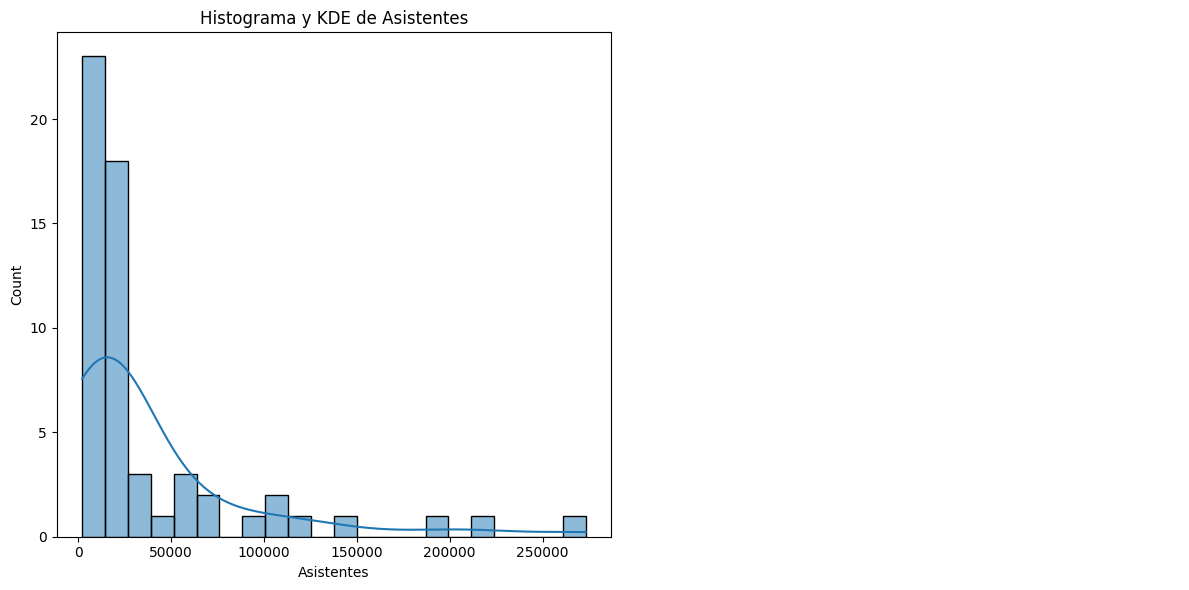

In [66]:
plot_histo_den(festivales_bcn_19, ["Asistentes"])

Anomalías outliers

(2,)


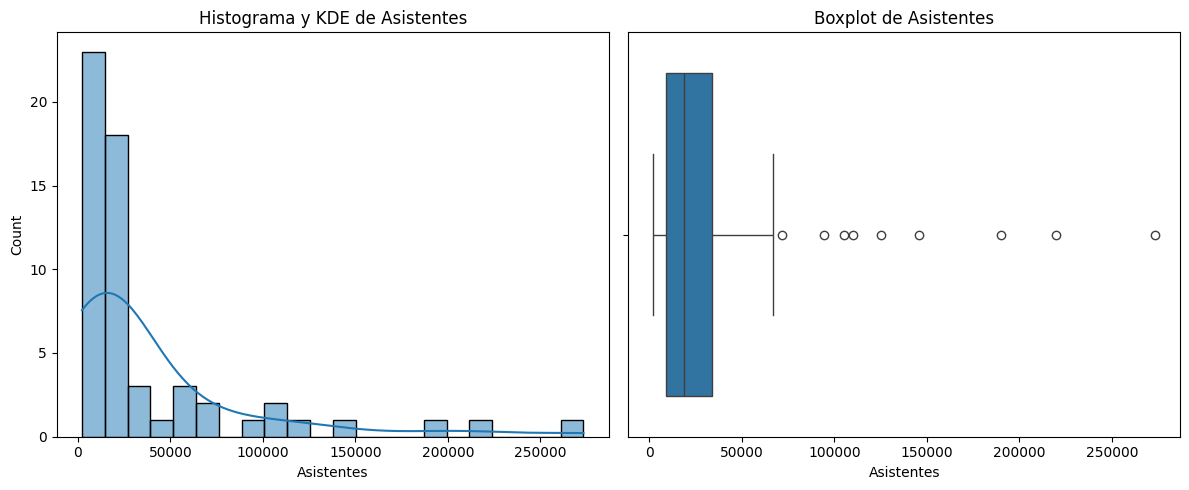

In [67]:
plot_combined_graphs(festivales_bcn_19, ["Asistentes"])

In [68]:
festivales_bcn_19

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
1,Audiovisuals,6.0,Americana Film Fest,Privada,Marzo,Invierno,12370.0,De Pago
2,Arts visuals,6.0,Art Photo BCN,Privada,Marzo,Primavera,2500.0,De Pago
3,Audiovisuals,7.0,Asian Film Festival,Privada,Octubre,Otoño,8374.0,De Pago
4,Música,7.0,Bachcelona,Privada,Julio,Verano,3600.0,De Pago
5,Música,27.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Verano,94150.0,Gratis
6,Arts visuals,14.0,Barcelona Design Week City Festival,Privada,Junio,Primavera,67000.0,De Pago
7,Arts visuals,10.0,Barcelona Dibuixa,Pública,Octubre,Otoño,18876.0,Gratis
8,Multidisciplinaris i altres,5.0,Barcelona Districte Cultural,Pública,Febrero,Invierno,19603.0,Gratis
9,Multidisciplinaris i altres,6.0,Barcelona Districte Cultural,Pública,Octubre,Otoño,17962.0,Gratis
10,Arts visuals,5.0,Barcelona Gallery Weekend,Privada,Octubre,Otoño,20000.0,De Pago
